In [2]:
# Step 1: Load and inspect the dataset
import pandas as pd

# Read CSV file
df = pd.read_csv('/content/Covid19-data.csv')

# Display basic info
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Display first few rows
df.head()


Shape of dataset: (259153, 67)

Columns:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'peo

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-2-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-2-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-2-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-2-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-2-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


count    2.443580e+05
mean     1.176359e+04
std      8.196096e+04
min      0.000000e+00
25%      0.000000e+00
50%      3.700000e+01
75%      8.180000e+02
max      4.082890e+06
Name: new_cases, dtype: float64


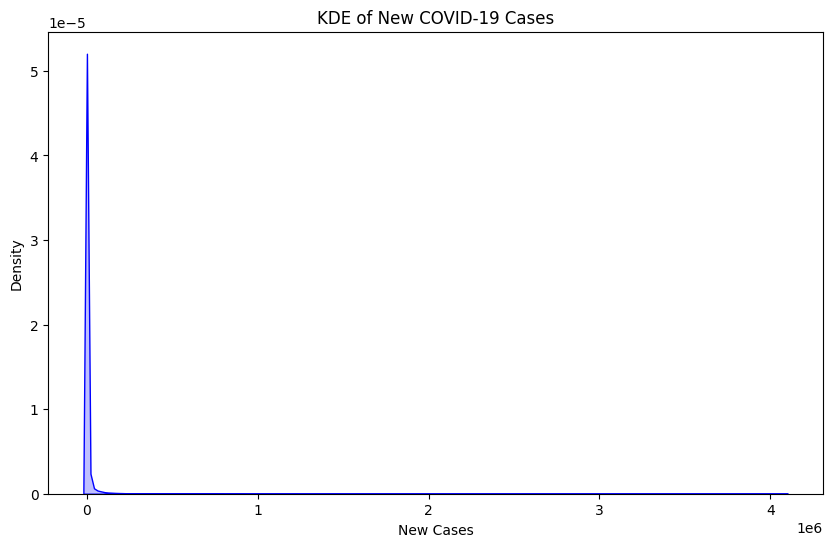

In [3]:
# Step 2: Select feature and clean data
import matplotlib.pyplot as plt
import seaborn as sns

# Select the column for KDE
data = df['new_cases'].dropna()

# Display basic statistics
print(data.describe())

# Plot KDE
plt.figure(figsize=(10,6))
sns.kdeplot(data, fill=True, color='blue')
plt.title('KDE of New COVID-19 Cases')
plt.xlabel('New Cases')
plt.ylabel('Density')
plt.show()


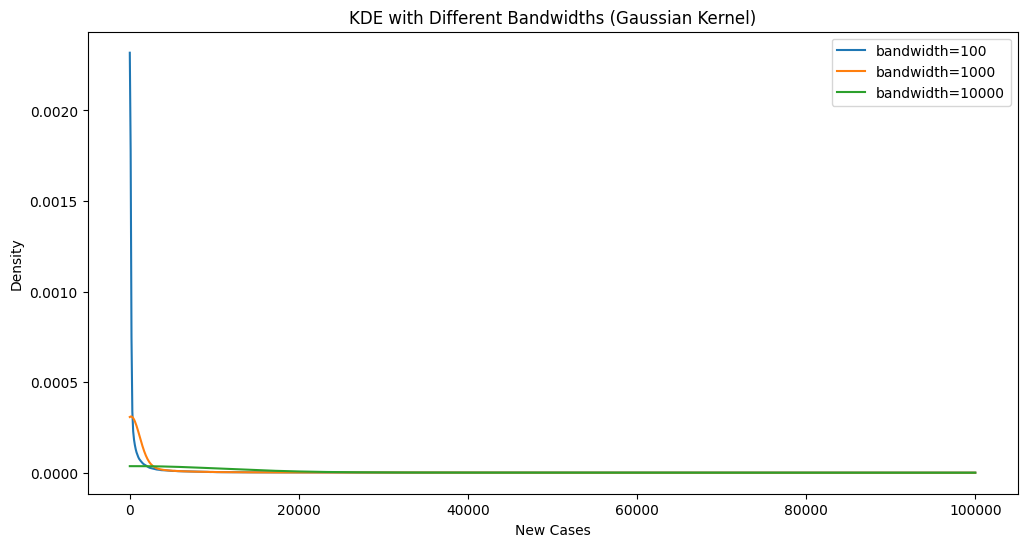

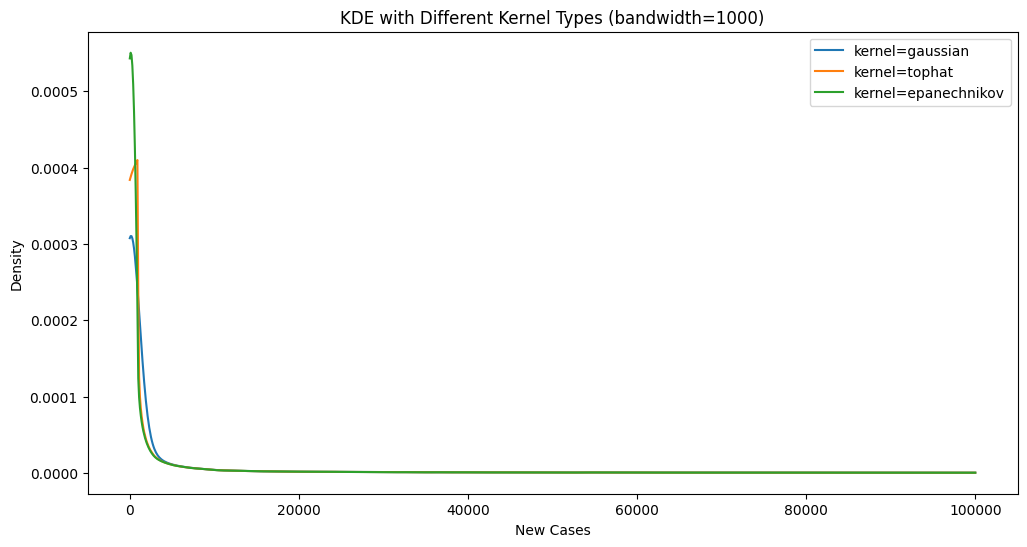

In [4]:
# Step 3: Bandwidth tuning and kernel comparison
from sklearn.neighbors import KernelDensity
import numpy as np

# Convert data to numpy array and reshape for sklearn
x = data.values.reshape(-1, 1)

# Define bandwidths to test
bandwidths = [100, 1000, 10000]

# Define kernel types to test
kernels = ['gaussian', 'tophat', 'epanechnikov']

plt.figure(figsize=(12,6))

# Compare KDEs with different bandwidths
for bw in bandwidths:
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(x)
    x_plot = np.linspace(0, 100000, 1000)[:, np.newaxis]
    log_dens = kde.score_samples(x_plot)
    plt.plot(x_plot[:,0], np.exp(log_dens), label=f'bandwidth={bw}')

plt.title('KDE with Different Bandwidths (Gaussian Kernel)')
plt.xlabel('New Cases')
plt.ylabel('Density')
plt.legend()
plt.show()

# Compare different kernel types
plt.figure(figsize=(12,6))
for k in kernels:
    kde = KernelDensity(kernel=k, bandwidth=1000).fit(x)
    log_dens = kde.score_samples(x_plot)
    plt.plot(x_plot[:,0], np.exp(log_dens), label=f'kernel={k}')

plt.title('KDE with Different Kernel Types (bandwidth=1000)')
plt.xlabel('New Cases')
plt.ylabel('Density')
plt.legend()
plt.show()


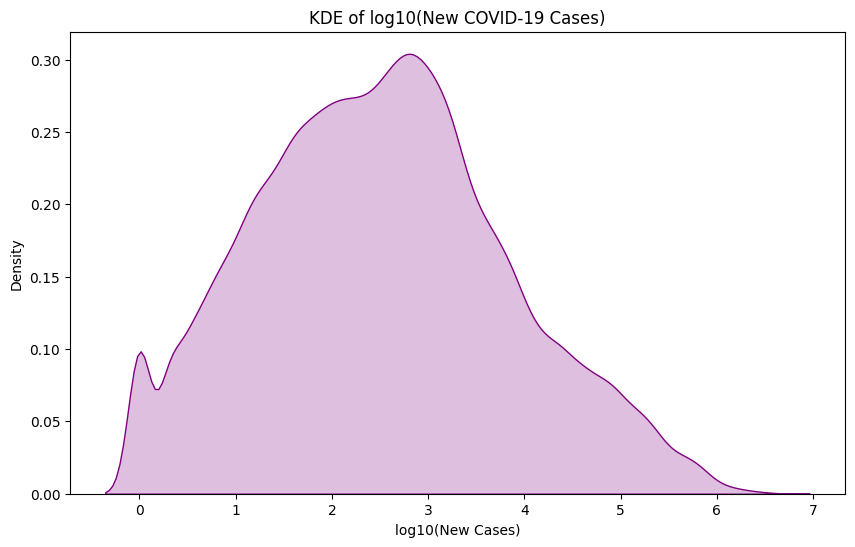

In [5]:
# Step 4: Apply log transformation
import numpy as np

# Remove zeros before log transformation
data_nonzero = data[data > 0]

# Apply log10 transformation
log_data = np.log10(data_nonzero)

# Plot KDE on log-transformed data
plt.figure(figsize=(10,6))
sns.kdeplot(log_data, fill=True, color='purple')
plt.title('KDE of log10(New COVID-19 Cases)')
plt.xlabel('log10(New Cases)')
plt.ylabel('Density')
plt.show()


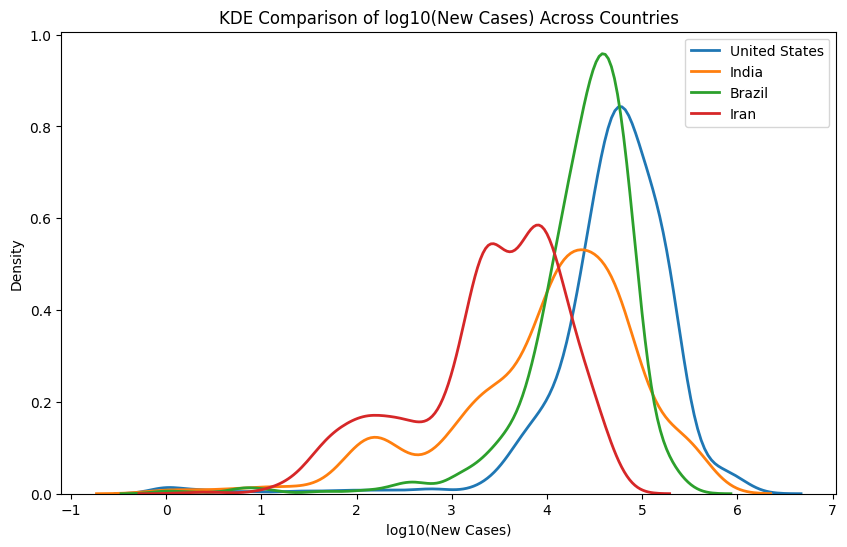

In [6]:
# Step 5: Compare KDEs across selected countries
countries = ['United States', 'India', 'Brazil', 'Iran']

plt.figure(figsize=(10,6))
for country in countries:
    subset = df[df['location'] == country]['new_cases']
    subset = subset[subset > 0]  # remove zeros
    log_subset = np.log10(subset)
    sns.kdeplot(log_subset, label=country, linewidth=2)

plt.title('KDE Comparison of log10(New Cases) Across Countries')
plt.xlabel('log10(New Cases)')
plt.ylabel('Density')
plt.legend()
plt.show()


In [7]:
# Step 6: Interactive KDE Dashboard (Scott & Silverman Bandwidths)
!pip install dash plotly scipy --quiet

import numpy as np
import pandas as pd
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

# Use USA data for this example
usa = df[df['location'] == 'United States']['new_cases']
usa = usa[usa > 0]

# Rule-of-thumb bandwidth calculations
n = len(usa)
std_dev = np.std(usa)
q1, q3 = np.percentile(usa, [25, 75])
iqr = q3 - q1

scott_bw = 1.06 * std_dev * (n ** (-1/5))
silverman_bw = 0.9 * np.minimum(std_dev, iqr / 1.34) * (n ** (-1/5))

# Initialize Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H2("COVID-19 USA: Daily New Cases KDE Visualization"),

    html.Div([
        html.Label("Select number of bins for Histogram:"),
        dcc.RadioItems(
            id='bins-radio',
            options=[
                {'label': '10 bins', 'value': 10},
                {'label': '20 bins', 'value': 20},
                {'label': '30 bins', 'value': 30}
            ],
            value=20,
            labelStyle={'display': 'block'}
        ),
        html.Br(),
        html.Label("Select KDE Bandwidth:"),
        dcc.RadioItems(
            id='bw-radio',
            options=[
                {'label': '0.1', 'value': 0.1},
                {'label': '0.2', 'value': 0.2},
                {'label': f'Recommended (Scott): {scott_bw:.2f}', 'value': scott_bw},
                {'label': f'Recommended (Silverman): {silverman_bw:.2f}', 'value': silverman_bw}
            ],
            value=scott_bw,
            labelStyle={'display': 'block'}
        ),
    ], style={'width': '20%', 'display': 'inline-block', 'verticalAlign': 'top', 'padding': '20px'}),

    html.Div([
        dcc.Graph(id='kde-graph')
    ], style={'width': '75%', 'display': 'inline-block'})
])

@app.callback(
    Output('kde-graph', 'figure'),
    [Input('bins-radio', 'value'),
     Input('bw-radio', 'value')]
)
def update_graph(n_bins, bw_value):
    x_grid = np.linspace(usa.min(), usa.max(), 1000)
    kde = gaussian_kde(usa, bw_method=bw_value / std_dev)
    kde_y = kde(x_grid)

    hist = go.Histogram(
        x=usa,
        nbinsx=n_bins,
        histnorm='probability density',
        name='Histogram',
        marker=dict(color='lightblue')
    )

    kde_line = go.Scatter(
        x=x_grid,
        y=kde_y,
        mode='lines',
        name=f'KDE (bw={bw_value:.2f})',
        line=dict(color='red', width=2)
    )

    fig = go.Figure(data=[hist, kde_line])
    fig.update_layout(
        title=f"Histogram (bins={n_bins}) + KDE (bandwidth={bw_value:.2f})",
        xaxis_title="Daily New Cases",
        yaxis_title="Density",
        bargap=0.05,
        template="plotly_dark"
    )
    return fig

# Run app in notebook (Dash >= 3.0)
app.run(debug=True, mode='inline')


<IPython.core.display.Javascript object>